# Task 5: Decision Trees and Random Forests
## Heart Disease Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


## Load Dataset

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Train Test Split

In [3]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Decision Tree Model

In [4]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9853658536585366


## Overfitting Analysis (Max Depth)

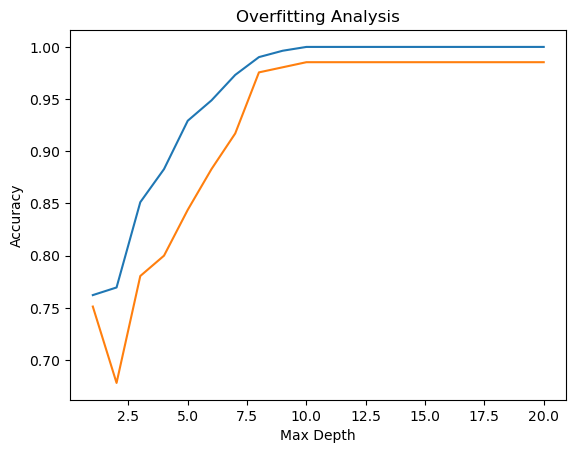

In [5]:
train_scores = []
test_scores = []
depth_range = range(1, 21)

for depth in depth_range:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.plot(depth_range, train_scores)
plt.plot(depth_range, test_scores)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting Analysis')
plt.show()

## Random Forest Model

In [6]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366


## Feature Importance

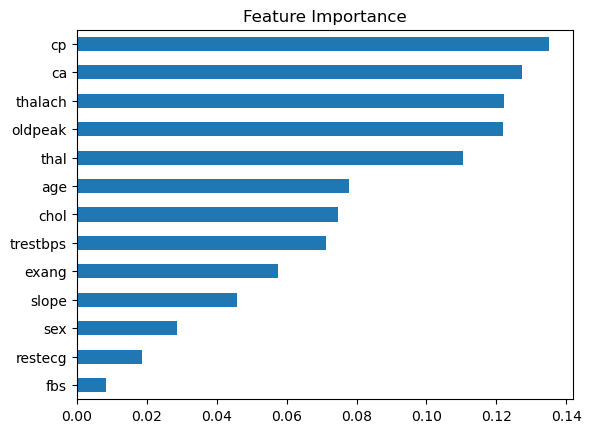

In [7]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()

## Cross Validation

In [8]:
cv_scores = cross_val_score(rf, X, y, cv=5)
print('Cross Validation Accuracy:', cv_scores.mean())


Cross Validation Accuracy: 0.9970731707317073


## Conclusion

In this project, we successfully applied **Decision Tree** and **Random Forest** classifiers to predict heart disease.

- The Decision Tree model was easy to interpret but showed signs of overfitting as tree depth increased.
- By controlling `max_depth`, we reduced overfitting and improved generalization.
- The Random Forest model achieved higher accuracy compared to a single Decision Tree because it combines multiple trees (ensemble learning).
- Feature importance analysis helped identify the most influential medical parameters affecting heart disease prediction.
- Cross-validation confirmed that the Random Forest model is more stable and reliable.

### Final Outcome:
Random Forest performed better than Decision Tree in terms of accuracy and robustness, making it the preferred model for this dataset.

This task helped understand:
- Tree-based learning
- Overfitting control
- Ensemble methods (Bagging)
- Feature importance
- Model evaluation using cross-validation

Overall, Random Forest provides a powerful and practical approach for medical classification problems like heart disease prediction.
